<a href="https://colab.research.google.com/github/Sashank11/learn_tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

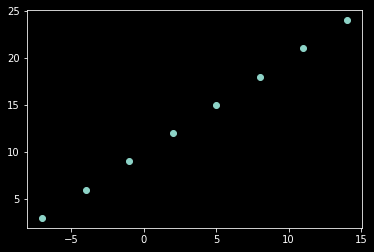

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
with plt.style.context('dark_background'):
  plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X.shape, y.shape

((8,), (8,))

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0] # In this case we use only 1 X value to predict 1 y value

(-7.0, 3.0)

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X);
y = tf.constant(y);
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

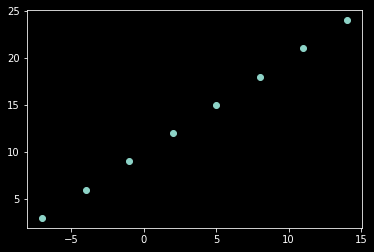

In [11]:
with plt.style.context("dark_background"):
  plt.scatter(X,y);

# Steps in modelling with TensorFlow

## 1.  Creating a model - define input, hidden, output layers of a DL model
## 2.  Compiling a model - define loss function(error rate/amount), optimizer and evaluation metrics
## 3.  Fitting a model - letting the model try to find patterns b/w X and y

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 1), # SGD: Stochasitc gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs=100);

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 522ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0048 - mae: 7.0048
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4578 - mae: 9.4578
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1106 - mae: 10.1106
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2394 - mae: 8.2394
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 5.5039 - mae: 5.5039
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 4.3896 - mae: 4.3896
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9851 - mae: 4.9851
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 4.8325 - mae: 4.8325
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 4.0845 - mae: 4.0845
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 2.8519 - mae

In [13]:
# Try and make prediction
model.predict([17.0])

array([[24.42508]], dtype=float32)

## Improving our Model
### We can improve model by altering the steps we took to Create
### 1. Creating a model - Here we add more layers, increase hidden units, change activation function of each layer
### 2. Compiling a model - Here we change Optimization function or learning rate
### 3. Fitting a model - increase epochs or increase data

In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation ="relu"),
  tf.keras.layers.Dense(100, activation ="relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.1),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 445ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 99.7780 - mae: 99.7780
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2314 - mae: 9.2314
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9976 - mae: 12.9976
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4197 - mae: 11.4197
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 5.2410 - mae: 5.2410
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 18.7342 - mae: 18.7342
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2566 - mae: 7.2566
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0452 - mae: 9.0452
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8199 - mae: 9.8199
Epoch 11/100
1/1 [==============================] - 0s 6ms/step 

In [15]:
model.predict([17.0])

array([[26.582006]], dtype=float32)

## Evaluating a model

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize", "Visualize", "Visualize"

It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the Original Labels)?

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

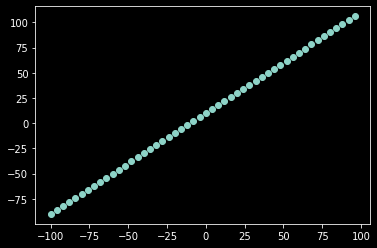

In [18]:
# Visualize data
with plt.style.context("dark_background"):
  plt.scatter(X,y)

## The 3 Sets
* Training Set - model learns pn 70-80% of the data
* Validation Set - model is tuned on 10-15% of the data
* Test Set - model is evaluated pn 10-15% of the data

In [19]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40] 

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got out data in training and test sets... let's visualize it again!

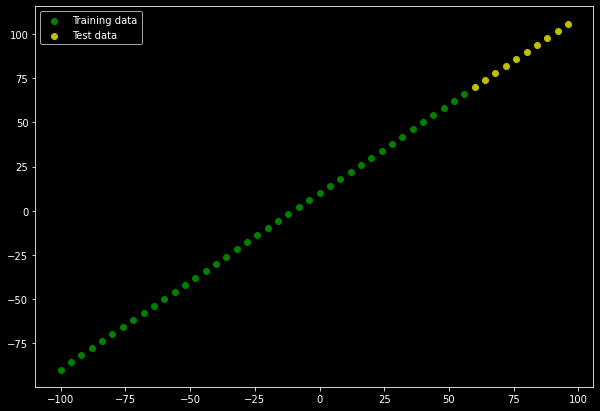

In [20]:
with plt.style.context("dark_background"):
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(X_train, y_train, c = "g", label = "Training data")
  # Plot training data in green
  plt.scatter(X_test, y_test, c = "y", label = "Test data")
  # show legend
  plt.legend();

In [21]:
# Let's have a look at how to vuld a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = "mae")

# # 3. Fit the model
# model.fit(X_train, y_train, epochs = 100)

### Visualizing the model

In [22]:
# model.summary()

In [60]:
# let's create a modle which builds automatically by defining the  input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =[1], name = "input_layer"),
    tf.keras.layers.Dense(10, input_shape = [1], name = "hidden_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")
# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters(patterns) the model can upadte as it trains
* Non-trainable params - these params aren't updated during training (these is typical when you bring in already learned patterns or parameters from other models during **transfer learning**) 

In [61]:
# lets fit our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

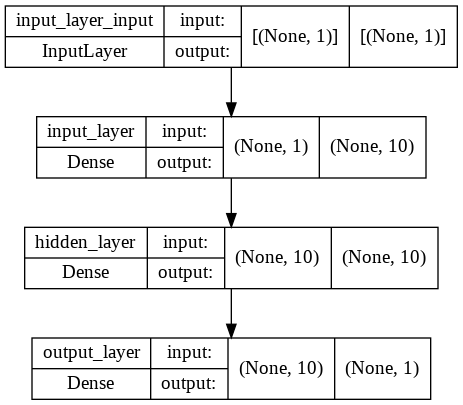

In [62]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions its a goood idea to plot them against the ground truth labels.

In [63]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.968254],
       [ 75.031235],
       [ 79.09422 ],
       [ 83.157196],
       [ 87.220184],
       [ 91.283165],
       [ 95.346146],
       [ 99.40913 ],
       [103.472115],
       [107.535095]], dtype=float32)

In [64]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [65]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  with plt.style.context("dark_background"):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize = (10,7))
    # Plot traing data in blue
    plt.scatter(train_data, train_labels, c = "b", label = "Train Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c = 'g', label = "Test Data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c = 'r',  label = "Predictions")
    # Show legend
    plt.legend();

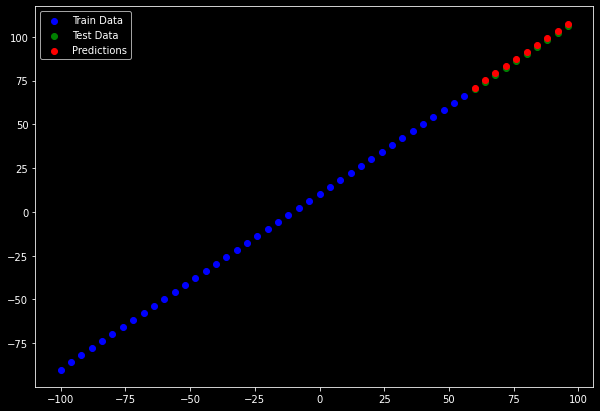

In [66]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

## Evaluating our model's predictions with regression evaluation metrics

In [67]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 219ms/step - loss: 1.2517 - mae: 1.2517


[1.251673936843872, 1.251673936843872]

In [69]:
# Calculate the mean absolute error
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.225397, 14.181259, 11.962311, 10.568561, 10.      , 10.256633,
       11.338458, 13.245476, 15.977692, 19.535095], dtype=float32)>

In [76]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [72]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.968254],
       [ 75.031235],
       [ 79.09422 ],
       [ 83.157196],
       [ 87.220184],
       [ 91.283165],
       [ 95.346146],
       [ 99.40913 ],
       [103.472115],
       [107.535095]], dtype=float32)>

In [75]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.968254,  75.031235,  79.09422 ,  83.157196,  87.220184,
        91.283165,  95.346146,  99.40913 , 103.472115, 107.535095],
      dtype=float32)>

In [74]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2516739>

In [78]:
# Calculate mse
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.5994134>

In [79]:
# Make function to reuse mae and mse

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = y_pred)

## Running experiments to improve our model
